** Performed Principal Component Analysis (PCA) on the given dataset and implement a Support Vector Machine (SVM) from scratch. Compare the results of your SVM with Logistic Regression, both with and without PCA**

## Implementing Logistic Regression without and with PCA

### Step 1: Importing dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Step 2: Cleaning the dataset

In [6]:
# Removing unecessary columns

df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [8]:
# Dropping the two records with null Embarked values
df.dropna(subset=['Embarked'], inplace=True)

In [9]:
# Filling null Age values with median
df['Age'].fillna(df['Age'].median(), inplace= True)

C:\Temp\ipykernel_76848\2233227431.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace= True)


In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [11]:
df.shape

(889, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Step 3: Data Preprocessing

In [14]:
# Encoding categorical variables

print(df['Survived'].unique())
print(df['Pclass'].unique())
print(df['Sex'].unique())
print(df['Embarked'].unique())  
print(df['SibSp'].unique())
print(df['Parch'].unique())


[0 1]
[3 1 2]
['male' 'female']
['S' 'C' 'Q']
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]


In [15]:
df['Sex']= df['Sex'].map({'male': 0, 'female': 1})
df['Embarked']= df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [16]:
# Train-test split (80-20 split)

X= df.drop('Survived', axis=1)
y= df['Survived']

m= X.shape[0]
train_size= int(0.8 * m)

X_train= X.iloc[:train_size, :]
X_test= X.iloc[train_size:, :]
y_train= y.iloc[:train_size]
y_test= y.iloc[train_size:]

In [17]:
# Scaling the features (Standardisation or Z-score normalisation)

mean= X_train.mean()
std= X_train.std()

X_train_sc= (X_train - mean) / std
X_test_sc= (X_test - mean) / std

### Step 4: Building the Logistic Reg Model

In [18]:
# Sigmoid function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [19]:
# Log loss function

def log_loss(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    cost = cost / m
    return cost

In [20]:
# Compute gradient

def compute_gradient(X, y, w, b): 
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i, j]
        dj_db += err_i

    dj_dw /= m
    dj_db /= m
    return dj_db, dj_dw

In [21]:
# Compute gradient descent

def grad_des(X, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = w_in.copy()
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(X, y, w, b)

        # update parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # store loss
        J_history.append(log_loss(X, y, w, b))

    return w, b, J_history

### Step 5: Training the model

In [22]:
w_init = np.zeros(X_train.shape[1])
b_init = 0.0

X_train_np = X_train_sc.to_numpy()
y_train_np = y_train.to_numpy()

w, b, J_history = grad_des(X_train_np, y_train_np, w_init, b_init, 0.01, 3000)


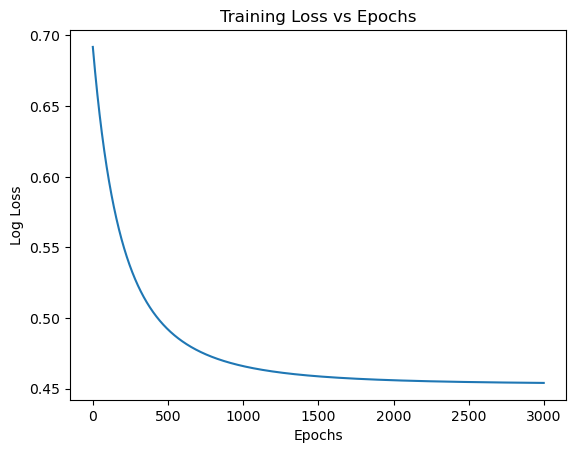

In [23]:
# Loss vs epochs plot

plt.figure()
plt.plot(J_history)
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Training Loss vs Epochs")
plt.show()

### Step 6: Testing the model without PCA

In [24]:
X_test_np = X_test_sc.to_numpy()
y_test_np = y_test.to_numpy()


In [25]:
z = np.dot(X_test_np, w) + b
probs = sigmoid(z)
y_pred = (probs >= 0.5).astype(int)


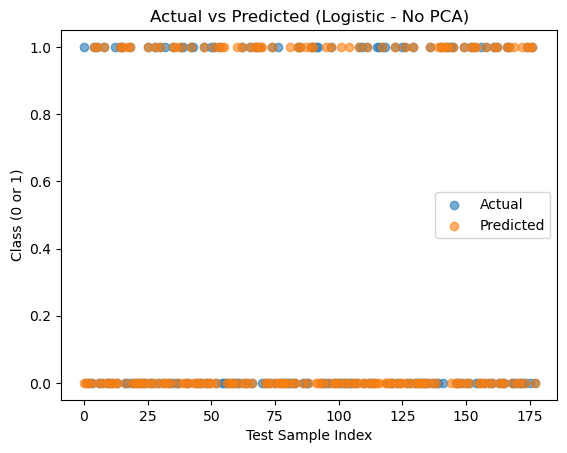

In [26]:
plt.figure()

plt.scatter(range(len(y_test_np)), y_test_np, label="Actual", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.6)

plt.xlabel("Test Sample Index")
plt.ylabel("Class (0 or 1)")
plt.title("Actual vs Predicted (Logistic - No PCA)")
plt.legend()
plt.show()


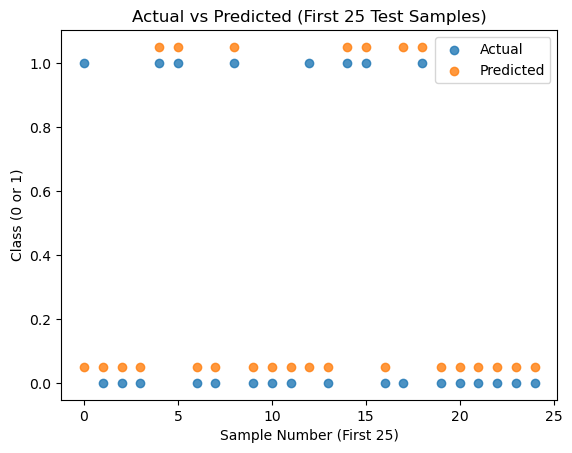

In [27]:
import matplotlib.pyplot as plt

# First 25 samples
y_test_25 = y_test_np[:25]
y_pred_25 = y_pred[:25]

plt.figure()

plt.scatter(range(25), y_test_25, label="Actual", alpha=0.8)
plt.scatter(range(25), y_pred_25 + 0.05, label="Predicted", alpha=0.8)

plt.xlabel("Sample Number (First 25)")
plt.ylabel("Class (0 or 1)")
plt.title("Actual vs Predicted (First 25 Test Samples)")
plt.legend()
plt.show()


### Step 7: Evaluating our model without PCA

In [28]:
accuracy = np.sum(y_pred == y_test_np) / len(y_test_np)
print("Accuracy:", accuracy)


Accuracy: 0.8146067415730337


In [29]:
TP = np.sum((y_pred == 1) & (y_test_np == 1))
TN = np.sum((y_pred == 0) & (y_test_np == 0))
FP = np.sum((y_pred == 1) & (y_test_np == 0))
FN = np.sum((y_pred == 0) & (y_test_np == 1))

print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)


TP: 47
TN: 98
FP: 17
FN: 16


In [30]:
precision = TP / (TP + FP)
print("Precision:", precision)


Precision: 0.734375


In [31]:
recall = TP / (TP + FN)
print("Recall:", recall)


Recall: 0.746031746031746


In [32]:
f1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score:", f1)


F1 Score: 0.7401574803149606


**Now we will implement Logistic Reg with PCA**

### Step 8: Centering the training data

In [33]:
X_train= X_train_sc.to_numpy()
X_test= X_test_np



In [34]:
mean= np.mean(X_train, axis= 0)
X_train_centered= X_train - mean

### Step 9: Computing Covariance Matrix, and Eigenvectors and Eigenvalues

In [35]:
# Computing covariance matrix

m= X_train_centered.shape[0]

cov_matrix= (1/(m-1)) * np.dot(X_train_centered.T, X_train_centered)

In [36]:
# Computing eigenvalues and eigenvectors

eig_val, eig_vec= np.linalg.eig(cov_matrix)

In [37]:
# We can use the straightforward sort method to sort eigenvalues, but sorting eigenvectors accordingly can get tricky.
# Hence we use argsort to get the sorted indices and then use those to sort both eigenvalues and eigenvectors.

idx= np.argsort(eig_val)[::-1]
eig_val_sorted= eig_val[idx]
eig_vec_sorted= eig_vec[:, idx]

### Step 10: Compute Explained Variance

In [38]:
exp_var_ratio= eig_val_sorted / np.sum(eig_val_sorted)  # Explained variance ratio
cumul_var = np.cumsum(exp_var_ratio)    # Cumulative explained variance

print("Explained Variance Ratio:", exp_var_ratio)
print("Cumulative Explained Variance:", cumul_var)

Explained Variance Ratio: [0.2230167  0.21743092 0.14121926 0.12118454 0.10056773 0.08605343
 0.06868534 0.04184209]
Cumulative Explained Variance: [0.2230167  0.44044762 0.58166687 0.70285141 0.80341915 0.88947257
 0.95815791 1.        ]


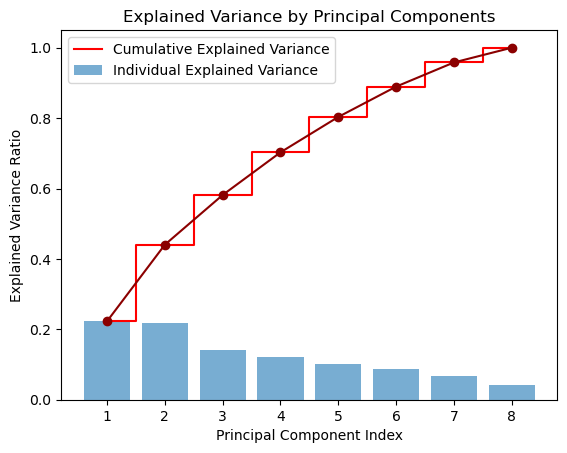

In [39]:
# Plotting explained variance ratio

plt.figure()
plt.bar(range(1, len(exp_var_ratio)+1), exp_var_ratio, alpha=0.6, label='Individual Explained Variance')
plt.step(range(1, len(cumul_var)+1), cumul_var, where='mid', label='Cumulative Explained Variance', color='red')
plt.plot(range(1, len(cumul_var)+1), cumul_var, marker='o', color='darkred')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

Here, we will use the 95% variance rule because it preserves most of the information and provides an objective, scientifically consistent basis for comparing model performance with and without PCA.

According to the elbow method, the first three PCs should be chosen, which keeps only approx. 60-70% variance, thus leading to significant information loss compared to the 95% variance rule.

In [40]:
k= np.argmax(cumul_var >= 0.95) + 1  # +1 because index starts at 0
print("No. of components chosen: ", k)

No. of components chosen:  7


In [41]:
W= eig_vec_sorted[:, :k]  # Projection matrix

### Step 11: Projecting Training Data and Transforming Test Data

In [42]:
# Projecting the data onto the new subspace

X_train_pca= np.dot(X_train_centered, W)

# Transforming the test data

X_test_centered= X_test - mean
X_test_pca= np.dot(X_test_centered, W)

### Step 12: Testing Log Reg + PCA Model

In [43]:
w_init = np.zeros(X_train_pca.shape[1])

w, b, J_history = grad_des(X_train_pca, y_train_np, w_init, b_init, 0.01, 3000)

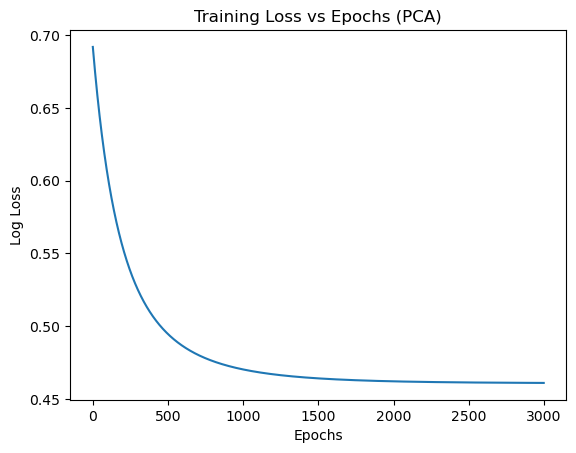

In [44]:
# Plotting loss vs epochs

plt.figure()
plt.plot(J_history)
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Training Loss vs Epochs (PCA)")
plt.show()

In [45]:
z = np.dot(X_test_pca, w) + b
probs = sigmoid(z)
y_pred = (probs >= 0.5).astype(int)

In [46]:
accuracy = np.sum(y_pred == y_test_np) / len(y_test_np)
print("Accuracy (Logistic + PCA):", accuracy)


Accuracy (Logistic + PCA): 0.8370786516853933


In [47]:
TP = np.sum((y_pred == 1) & (y_test_np == 1))
TN = np.sum((y_pred == 0) & (y_test_np == 0))
FP = np.sum((y_pred == 1) & (y_test_np == 0))
FN = np.sum((y_pred == 0) & (y_test_np == 1))

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.8148148148148148
Recall: 0.6984126984126984
F1 Score: 0.7521367521367521


**Interpretation**

PCA:

- Removed some noise/redundancy

- Helped the model be more confident when predicting survival (higher precision)

- Slightly reduced ability to capture all actual survivors (recall drop)

Overall, PCA slightly improved overall performance.

## Implementing SVM without and with PCA

**Step 1: Converting labels and Initialising Parameters**

In [48]:
# SVM requires labels in -1 and 1 format, hence we convert 1 to 1 and 0 to -1

y_train_svm= np.where(y_train_np == 0, -1, 1)
y_test_svm= np.where(y_test_np == 0, -1, 1)

w= np.zeros(X_train_np.shape[1])
b= 0.0

**Step 2: Implementing Hinge Loss**

In [50]:
def hinge_loss(X, y, w, b, lambda_cons, lr, iters):

    for _ in range(iters):
        for i, x_i in enumerate(X):

            condition= y[i] * (np.dot(x_i, w) + b) >= 1 # checks if the point is correctly classified with margin

            if condition:
                w-= lr * (2 * lambda_cons * w)
            else:
                # Misclassified or within margin
                w -= lr * (2 * lambda_cons * w - np.dot(x_i, y[i]))
                b -= lr * y[i]

    return w, b

In [59]:
w, b= hinge_loss(X_train_np, y_train_svm, w, b, 0.01, 0.0001, 1000)

print("Trained weights:", w)
print("Trained bias:", b)

Trained weights: [ 0.49611701 -7.20264837 12.37016466 -1.69557286 -0.77703377  1.38237418
  5.31465002  2.81056463]
Trained bias: 86.02400000143209


**Step 3: Prediction**

In [60]:
pred= np.dot(X_test_np, w) + b # Linear decision function
y_pred_svm= np.sign(pred) # Get class labels based on sign of prediction

In [61]:
# Converting -1 back to 0 for evaluation

y_pred_svm= np.where(y_pred_svm == -1, 0, 1)

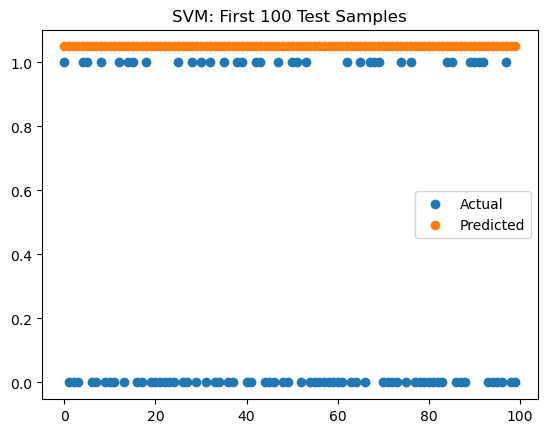

In [56]:
# First 25 samples

plt.scatter(range(100), y_test_np[:100], label="Actual")
plt.scatter(range(100), y_pred_svm[:100] + 0.05, label="Predicted")
plt.legend()
plt.title("SVM: First 100 Test Samples")
plt.show()


In [62]:
TP = np.sum((y_pred_svm == 1) & (y_test_np == 1))
TN = np.sum((y_pred_svm == 0) & (y_test_np == 0))
FP = np.sum((y_pred_svm == 1) & (y_test_np == 0))
FN = np.sum((y_pred_svm == 0) & (y_test_np == 1))

print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)


TP: 63
TN: 0
FP: 115
FN: 0
